In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/rawdata/RawData1'):
    for filename in filenames[:5]:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rawdata/RawData1/03-01-03-01-02-02-13.wav
/kaggle/input/rawdata/RawData1/03-01-03-01-01-01-18.wav
/kaggle/input/rawdata/RawData1/03-01-02-01-01-01-21.wav
/kaggle/input/rawdata/RawData1/03-01-05-02-02-02-15.wav
/kaggle/input/rawdata/RawData1/03-01-05-01-01-02-03.wav


In [3]:
import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import random


mylist= os.listdir('/kaggle/input/rawdata/RawData1/')
mylist[:5]

['03-01-03-01-02-02-13.wav',
 '03-01-03-01-01-01-18.wav',
 '03-01-02-01-01-01-21.wav',
 '03-01-05-02-02-02-15.wav',
 '03-01-05-01-01-02-03.wav']

In [4]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')

In [5]:
labels = pd.DataFrame(feeling_list)
labels

,0
0,male_happy
1,female_happy
2,male_calm
3,male_angry
4,male_angry
...,...
955,male_angry
956,male_fearful
957,male_fearful
958,female_angry


In [7]:
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def extract_mfcc(file_path):
    audio, sr = librosa.load(file_path)
    total_duration = librosa.get_duration(y=audio, sr=sr)
    duration = min(max(total_duration * 0.9, 3), 10)
    audio, sr = librosa.load(file_path, duration=duration)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    if mfcc.shape[1] < 400:
        mfcc = np.pad(mfcc, ((0, 0), (0, 400 - mfcc.shape[1])), mode='constant')
    else:
        mfcc = mfcc[:, :400]
    return mfcc

X = []
y = feeling_list

for file in mylist:
    file_path = os.path.join('/kaggle/input/rawdata/RawData1/', file)
    mfcc = extract_mfcc(file_path)
    X.append(mfcc)

X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

le = LabelEncoder()
y = le.fit_transform(y)



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1435 - loss: 6.7622 - val_accuracy: 0.3333 - val_loss: 1.7583 - learning_rate: 0.0010
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4077 - loss: 1.5464 - val_accuracy: 0.3802 - val_loss: 1.5790 - learning_rate: 0.0010
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5680 - loss: 1.1075 - val_accuracy: 0.4896 - val_loss: 1.3397 - learning_rate: 0.0010
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7674 - loss: 0.6971 - val_accuracy: 0.5104 - val_loss: 1.3035 - learning_rate: 0.0010
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7858 - loss: 0.5362 - val_accuracy: 0.6094 - val_loss: 1.2898 - learning_rate: 0.0010
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8660 - loss: 0.3870 - val_accuracy: 0.6146 - val_loss: 1.5361 - learning_rate: 0.0010
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8800 - loss: 0.3211 - val_acc

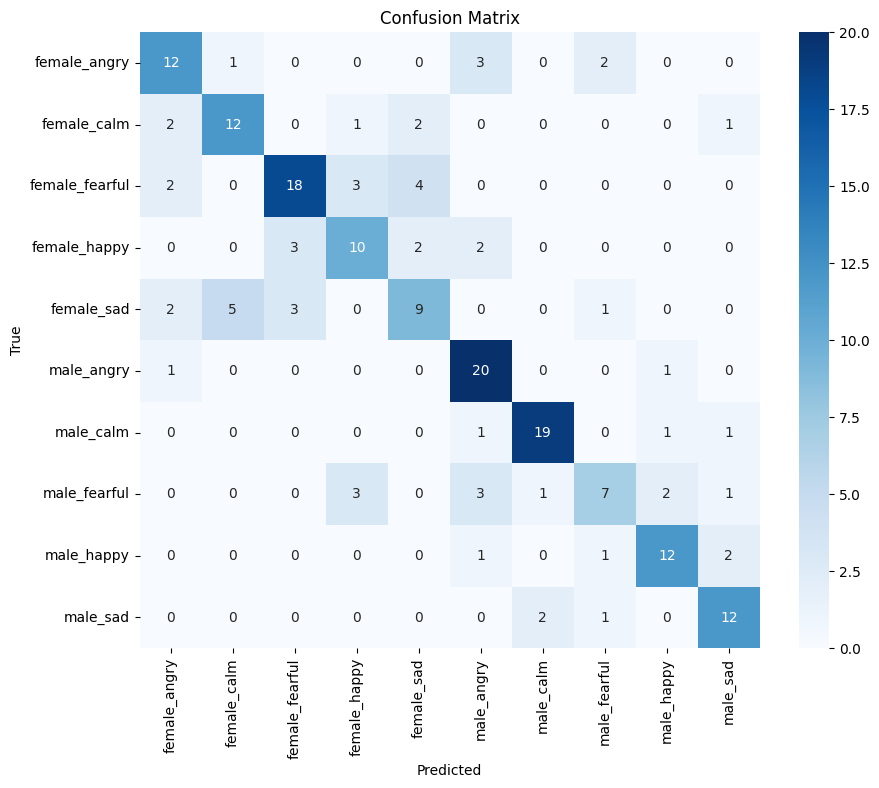

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=15,
    restore_best_weights=True,
    monitor="val_accuracy"
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=1e-6
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Epoch 1/100
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7802 - loss: 0.4817
Epoch 1: val_accuracy improved from -inf to 0.52083, saving model to Gender Model_best_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.7894 - loss: 0.4663 - val_accuracy: 0.5208 - val_loss: 5.5130
Epoch 2/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9410 - loss: 0.1443 
Epoch 2: val_accuracy did not improve from 0.52083
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9441 - loss: 0.1395 - val_accuracy: 0.5208 - val_loss: 4.6531
Epoch 3/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9865 - loss: 0.0587
Epoch 3: val_accuracy did not improve from 0.52083
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9864 - loss: 0.0577 - val_accuracy: 0.5208 - val_loss: 3.2924
Epoch 4/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9972 - loss: 0.0271
Epoch 4: val_accuracy improved from 0.52083 to 0.52604, saving model to Gender Model_best_model.keras
24/24 ━

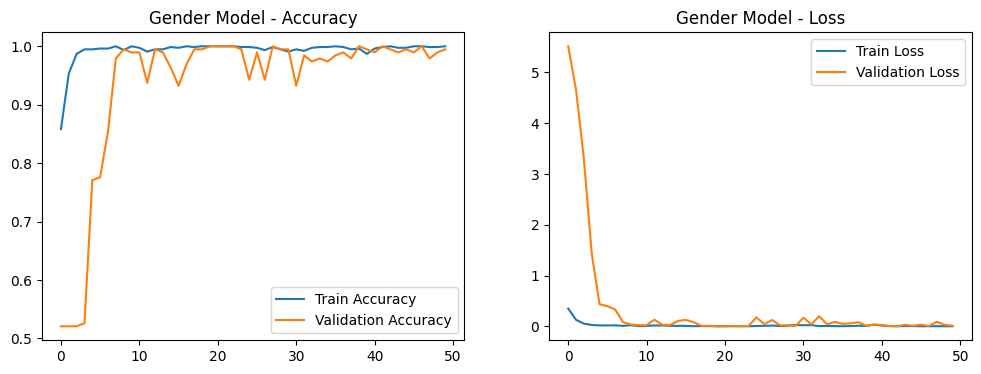

Epoch 1/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3086 - loss: 2.0089
Epoch 1: val_accuracy improved from -inf to 0.36979, saving model to Emotion Model_best_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.3119 - loss: 1.9934 - val_accuracy: 0.3698 - val_loss: 4.0172
Epoch 2/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4655 - loss: 1.3261
Epoch 2: val_accuracy did not improve from 0.36979
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4687 - loss: 1.3161 - val_accuracy: 0.2344 - val_loss: 5.8396
Epoch 3/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6195 - loss: 0.9761
Epoch 3: val_accuracy did not improve from 0.36979
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6199 - loss: 0.9754 - val_accuracy: 0.2396 - val_loss: 4.3575
Epoch 4/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7181 - loss: 0.7034
Epoch 4: val_accuracy did not improve from 0.36979
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7

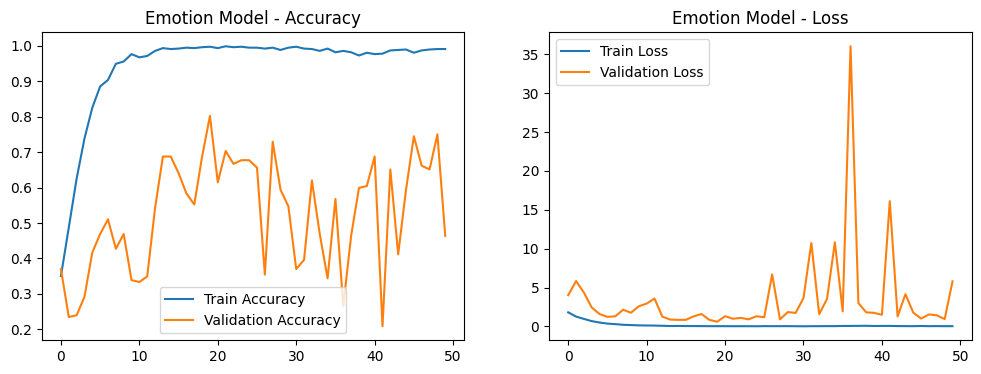

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0031  
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7757 - loss: 0.7217  
성별 분류 정확도: 1.0000
감정 분류 정확도: 0.8021
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

성별 분류 보고서:
              precision    recall  f1-score   support

      female       1.00      1.00      1.00       100
        male       1.00      1.00      1.00        92

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


감정 분류 보고서:
              precision    recall  f1-score   support

       angry       0.85      0.88      0.86        40
        calm       0.73      0.90      0.81        40
     fearful       0.81      0.77      0.79        44
       happy       0.77      0.70      0.73        33
         sad       0.87      0.74      0.80        35

    accuracy                           0.80       192
   macro 

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packag

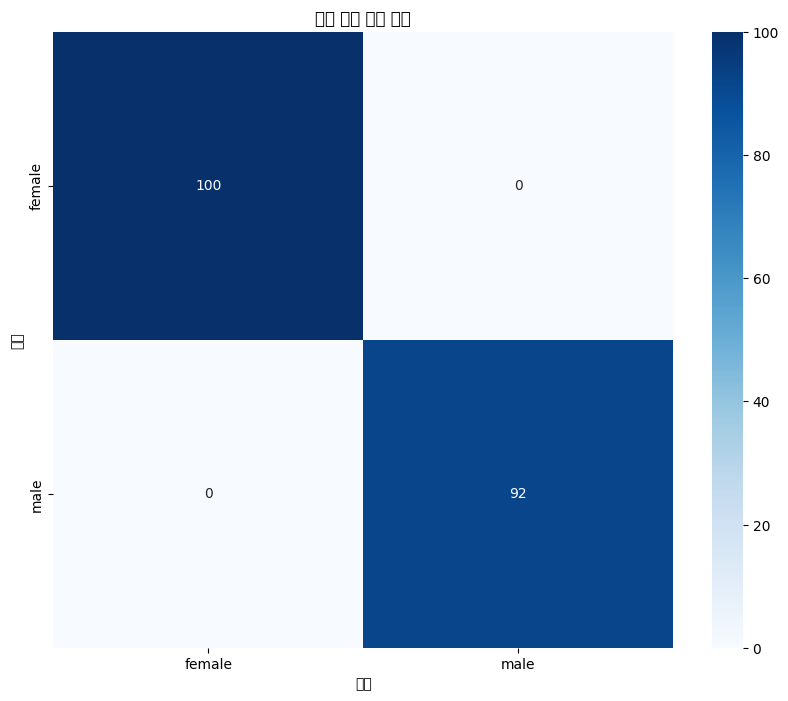

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages

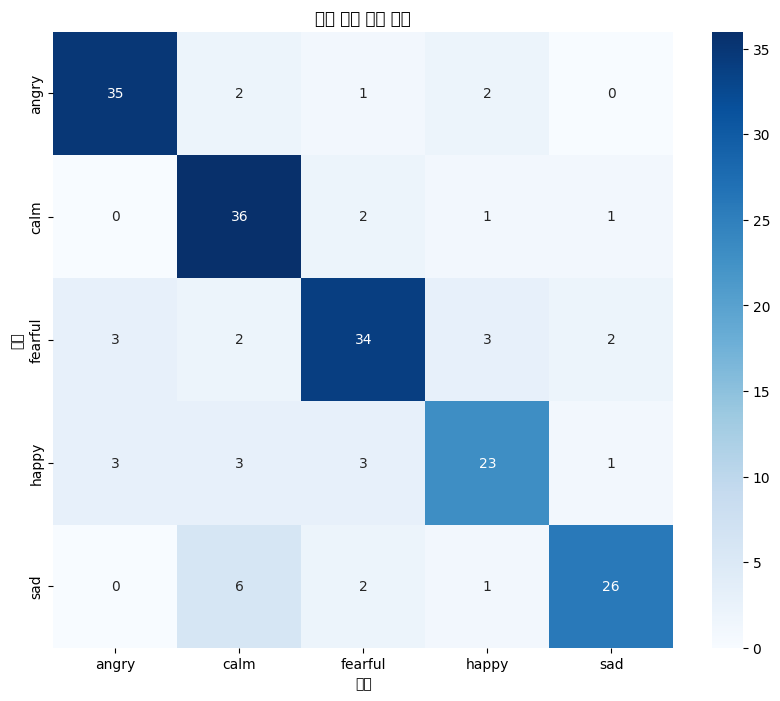


최종 분류 보고서:
                precision    recall  f1-score   support

  female_angry       0.79      0.83      0.81        18
   female_calm       0.71      0.83      0.77        18
female_fearful       0.81      0.81      0.81        27
  female_happy       0.75      0.71      0.73        17
    female_sad       0.82      0.70      0.76        20
    male_angry       0.91      0.91      0.91        22
     male_calm       0.75      0.95      0.84        22
  male_fearful       0.80      0.71      0.75        17
    male_happy       0.79      0.69      0.73        16
      male_sad       0.92      0.80      0.86        15

      accuracy                           0.80       192
     macro avg       0.81      0.79      0.80       192
  weighted avg       0.81      0.80      0.80       192



/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/

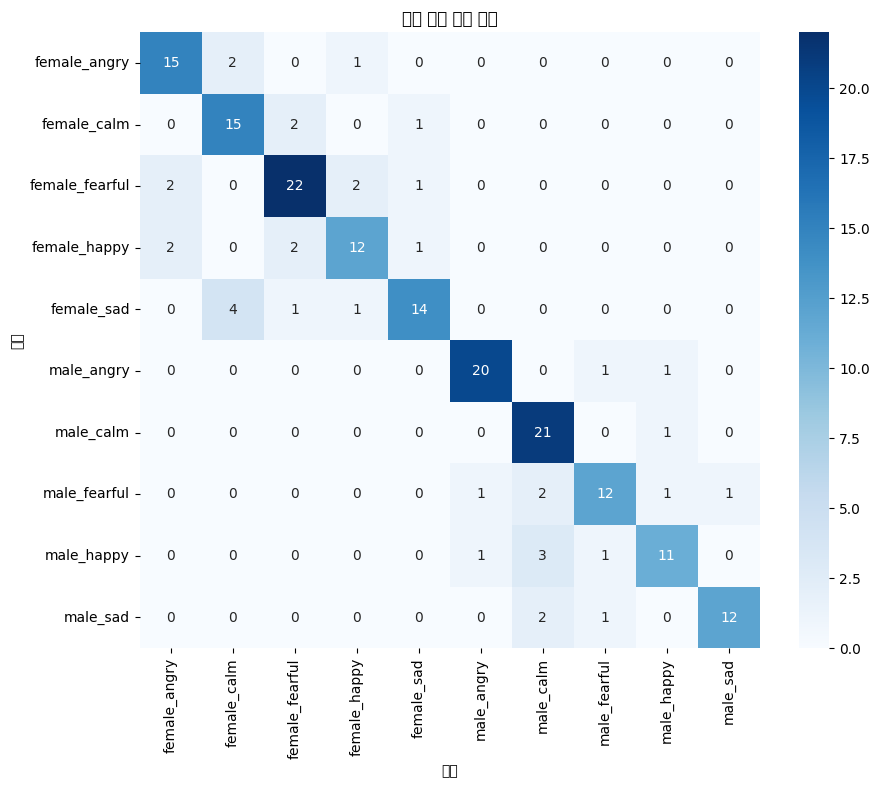

In [7]:
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def extract_mfcc(file_path):
    audio, sr = librosa.load(file_path)
    total_duration = librosa.get_duration(y=audio, sr=sr)
    duration = min(max(total_duration * 0.9, 3), 10)
    audio, sr = librosa.load(file_path, duration=duration)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    if mfcc.shape[1] < 400:
        mfcc = np.pad(mfcc, ((0, 0), (0, 400 - mfcc.shape[1])), mode='constant')
    else:
        mfcc = mfcc[:, :400]
    return mfcc

X = []
gender_list = []
emotion_list = []
mylist= os.listdir('/kaggle/input/rawdata/RawData1/')
for file in mylist:
    file_path = os.path.join('/kaggle/input/rawdata/RawData1/', file)
    mfcc = extract_mfcc(file_path)
    X.append(mfcc)
    
    gender = 'male' if int(file[18:-4]) % 2 == 1 else 'female'
    gender_list.append(gender)
    
    emotion_map = {'02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful'}
    emotion = emotion_map[file[6:-16]]
    emotion_list.append(emotion)

X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

le_gender = LabelEncoder()
y_gender = le_gender.fit_transform(gender_list)

le_emotion = LabelEncoder()
y_emotion = le_emotion.fit_transform(emotion_list)

X_train, X_test, y_gender_train, y_gender_test, y_emotion_train, y_emotion_test = train_test_split(
    X, y_gender, y_emotion, test_size=0.2, random_state=37
)

def create_model(num_classes, input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_test, y_test, model_name):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=30,
        restore_best_weights=True,
        mode='max'
    )

    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
        f'{model_name}_best_model.keras',  
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, model_checkpoint],
    )
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.legend()
    plt.show()
    
    return model

input_shape = (X.shape[1], X.shape[2], 1)
gender_model = create_model(2, input_shape)
emotion_model = create_model(5, input_shape)

gender_model = train_model(gender_model, X_train, y_gender_train, X_test, y_gender_test, 'Gender Model')
emotion_model = train_model(emotion_model, X_train, y_emotion_train, X_test, y_emotion_test, 'Emotion Model')

# 최고의 모델 로드
gender_model = tf.keras.models.load_model('Gender Model_best_model.keras') 
emotion_model = tf.keras.models.load_model('Emotion Model_best_model.keras') 

gender_loss, gender_acc = gender_model.evaluate(X_test, y_gender_test)
emotion_loss, emotion_acc = emotion_model.evaluate(X_test, y_emotion_test)

print(f'성별 분류 정확도: {gender_acc:.4f}')
print(f'감정 분류 정확도: {emotion_acc:.4f}')

y_gender_pred = gender_model.predict(X_test)
y_emotion_pred = emotion_model.predict(X_test)

y_gender_pred_classes = np.argmax(y_gender_pred, axis=1)
y_emotion_pred_classes = np.argmax(y_emotion_pred, axis=1)

print("\n성별 분류 보고서:")
print(classification_report(y_gender_test, y_gender_pred_classes, target_names=le_gender.classes_))

print("\n감정 분류 보고서:")
print(classification_report(y_emotion_test, y_emotion_pred_classes, target_names=le_emotion.classes_))

def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('예측')
    plt.ylabel('실제')
    plt.show()

plot_confusion_matrix(y_gender_test, y_gender_pred_classes, le_gender.classes_, '성별 분류 혼동 행렬')
plot_confusion_matrix(y_emotion_test, y_emotion_pred_classes, le_emotion.classes_, '감정 분류 혼동 행렬')

combined_pred = []
for gender, emotion in zip(y_gender_pred_classes, y_emotion_pred_classes):
    gender_label = le_gender.inverse_transform([gender])[0]
    emotion_label = le_emotion.inverse_transform([emotion])[0]
    combined_pred.append(f'{gender_label}_{emotion_label}')

combined_true = []
for gender, emotion in zip(y_gender_test, y_emotion_test):
    gender_label = le_gender.inverse_transform([gender])[0]
    emotion_label = le_emotion.inverse_transform([emotion])[0]
    combined_true.append(f'{gender_label}_{emotion_label}')

print("\n최종 분류 보고서:")
print(classification_report(combined_true, combined_pred))

plot_confusion_matrix(combined_true, combined_pred, np.unique(combined_true), '최종 분류 혼동 행렬')